#Некоторые сведения об алгоритме:

1.  Кластеризуемые данные поступают на вход в виде numpy массива строк фиксированной длины, а затем для удобства дальнейших вычислений каждому символу сопоставляется его ascii код
2.  Используется метрика в соответствии с требованиями
3.  Центроид нового кластера, полученного в результате объединения двух кластеров, рассчитывается как среднее арифметическое центроидов объединяемых кластеров c округлением вверх: каждая компонента цетроида нового кластера считается как среднее арифметическое соответствующих компонент центроидов объяединямых кластеров c округлением вверх






In [ ]:
import numpy as np

class StringClustering:

    def __init__(self, data, n_clusters):
        self.n_clusters = n_clusters
        self.data_int = np.ones((len(data), len(data[0])), dtype=int)
        for i in range(len(data)):
            for j in range(len(data[i])):
                self.data_int[i][j] = ord(data[i][j])
        self.centroids = self.data_int.copy()
        self.clusters = [[i] for i in range(len(self.data_int))]
        self.data_labels = np.zeros(len(self.data_int), dtype=int)
        self.centroids_labels = np.zeros(n_clusters, dtype=int)

    def __string_metric(self):
        n = len(self.centroids)
        adjaency_matrix = np.empty((n, n), dtype=float)
        for i, centroid_1 in enumerate(self.centroids):
            for j, centroid_2 in enumerate(self.centroids):
                set_1, set_2 = set(centroid_1), set(centroid_2)
                k = 0
                for elem_1 in set_1:
                    for elem_2 in set_2:
                        if elem_1 == elem_2:
                            k += 1
                if k == 0:
                    adjaency_matrix[i][j] = 9999
                else:
                    adjaency_matrix[i][j] = 1/k

        return adjaency_matrix


    def __compute_centroid(self, centroid_1, centroid_2):
        centroid = (centroid_1 + centroid_2)/2
        handler = lambda t: int(np.ceil(t))
        handled_centroid = np.array([handler(elem) for elem in centroid])
        return handled_centroid


    def fit_transform(self):
        curr_n_clusters = len(self.centroids)
        while curr_n_clusters > self.n_clusters:
            adjaency_matrix = self.__string_metric()
            np.fill_diagonal(adjaency_matrix, 10000)
            centroid_1_id, centroid_2_id = np.unravel_index(
                np.argmin(adjaency_matrix), adjaency_matrix.shape)
            new_centroid = self.__compute_centroid(
                self.centroids[centroid_1_id], self.centroids[centroid_2_id])

            self.centroids[centroid_1_id] = new_centroid
            self.centroids = np.delete(self.centroids, centroid_2_id, axis=0)
            self.clusters[centroid_1_id].extend(self.clusters[centroid_2_id])
            self.clusters.pop(centroid_2_id)
            curr_n_clusters -= 1

        for i, cluster in enumerate(self.clusters):
            self.data_labels[np.array(cluster)] = i
            self.centroids_labels[i] = i

        return self.data_labels


    def get_string_centroids(self):
        dtype = '<U' + str(len(self.centroids[0]))
        string_centroids = np.empty(len(self.centroids), dtype=dtype)
        handler = lambda t: chr(t)
        for i, centroid in enumerate(self.centroids):
            string_centroid = ''.join([handler(elem) for elem in centroid])
            string_centroids[i] = string_centroid
        return string_centroids


    def get_int_centroids(self):
        return self.centroids


    def get_centroid_labels(self):
        return self.centroids_labels

len(data) = 169
n_clusters = 10
str_len = 2

data = ['-"' '%$' '+,' '*(' '&"' "#'" '+-' '#+' '$+' '&#' '%,' "'#" "+'" '&%'
 '-!' '&&' '+(' '+*' '+)' '(%' ")'" '(,' '!!' '"(' '!(' '"#' '*,' '!*'
 "('" '%#' ')+' '+"' '!-' '((' '+%' '&!' '!$' '&*' '"-' ',&' '--' '+$'
 '#)' ',(' '-%' '&+' ',*' '*)' '*%' '%)' '%-' '$,' '&-' '$$' "'+" "'&"
 '$&' "'!" ',-' ',!' '""' '+!' '$-' '#(' '#%' '#&' "'-" '"\'' "')" "'*"
 '!&' '-#' '(&' '($' ',%' '"&' '-$' '##' '"!' '(*' '*+' "''" '()' '&,'
 '(!' "*'" ',#' "!'" '-*' '+&' '!,' '\'"' ')&' '!+' '!)' '!%' '-+' ')%'
 '$*' "'," '"$' '"%' ',$' '%*' '+#' '#*' '%%' '&)' "%'" '%+' ',"' "-'"
 '**' '$(' '",' '&(' '#!' ',+' '!#' '"*' '-(' '$%' '("' '#,' '%(' "$'"
 ')$' '*#' ')(' "&'" '++' '%!' '-)' "'(" '#"' '*-' "'$" '$#' '),' '%"'
 '*!' '"+' '-&' ",'" '*"' '&$' '))' '*$' '%&' '!"' ')!' ')"' '$!' "'%"
 ',,' ',)' '$"' '-,' '*&' ')*' '")' '(-' '$)' '#$' '(#' ')-' '#-' ')#'
 '(+']

labels = [0 0 0 1 2 0 0 0 0 0 1 0 1 3 0 3 4 5 4 0 0 4 6 0 0 7 5 3 0 2 4 0 0 0 0 2 7
 0

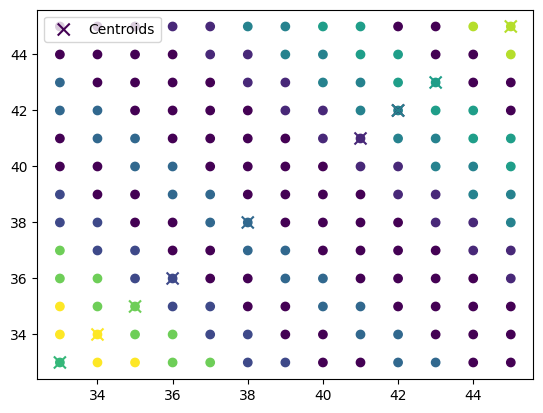

In [ ]:
import matplotlib.pyplot as plt

str_len = 2
data_len = 169
n_clusters = 10
dtype = '<U' + str(str_len)
data = np.empty(data_len, dtype=dtype)
handler = lambda t: chr(t)

start_value = 33
i = 0
for x in range(start_value, start_value + 13):
    for y in range(start_value, start_value + 13):
        data[i] = ''.join([handler(x), handler(y)])
        i += 1
np.random.shuffle(data)

print(f"len(data) = {len(data)}")
print(f"n_clusters = {n_clusters}")
print(f"str_len = {str_len}\n")
print(f"data = {data}\n")

string_clustering = StringClustering(data=data, n_clusters=n_clusters)
labels = string_clustering.fit_transform()
string_centroids = string_clustering.get_string_centroids()
int_centroids = string_clustering.get_int_centroids()
centroids_labels = string_clustering.get_centroid_labels()

print(f"labels = {labels}")
print(f"string_centroids = {string_centroids}")
print(f"int_centroids = {int_centroids}")
# для интереса попробуем графически изобразить
plt.scatter(x=string_clustering.data_int[:, 0],
            y=string_clustering.data_int[:, 1], c=labels)
plt.scatter(x=int_centroids[:, 0], y=int_centroids[:, 1],
            marker='x', s=75, c=centroids_labels, label='Centroids')
plt.legend()

In [ ]:
str_len = np.random.randint(1, 10)
data_len = np.random.randint(1, 50)
n_clusters = np.random.randint(1, data_len + 1)
dtype = '<U' + str(str_len)
data = np.empty(data_len, dtype=dtype)
handler = lambda t: chr(t)

for i in range(len(data)):
    data[i] = ''.join([handler(np.random.randint(33, 127))
                            for i in range(str_len)])

print(f"len(data) = {len(data)}")
print(f"n_clusters = {n_clusters}")
print(f"str_len = {str_len}\n")
print(f"data = {data}\n")

string_clustering = StringClustering(data=data, n_clusters=n_clusters)
labels = string_clustering.fit_transform()
string_centroids = string_clustering.get_string_centroids()
int_centroids = string_clustering.get_int_centroids()
print(f"labels = {labels}")
print(f"string_centroids = {string_centroids}")

len(data) = 47
n_clusters = 17
str_len = 7

data = ['n~5|qYd' '5$wrEW9' 'JE)^<L[' '#z]>}fR' '$2{?era' 'W#^Nwyi' '97j!/&V'
 'r)U^EY`' '3SvwIq#' '_cjrZ~+' 'InmnhDm' '8$3T$Gf' '&VU&%<Q' '"xRx[{1'
 'jDjl4A~' '\\#j/}yh' '#aCUElL' 'hrQg9ZL' '-yhcePK' '"<17f[-' 'x"M*[K8'
 '>--B=99' '\\P6}`c)' '3x7+Py?' 'oeTT)k[' 'Cb23pB9' '>WzB4A]' 'q&dQf7^'
 '//,Nt+@' 'WRBUiC9' '!U^pZSG' 'O@D~3R#' '2$S=*r/' '(.TG*Nc' '*VoQzoK'
 'l$0uL~t' '4QkylDF' '2^!A)td' 'HpvwkcB' 'Q,o/3\\*' 'CVVZF{?' '<!a(DjE'
 '8`pL"Q}' '^OfXeUM' 'LNFX%eL' '$+\\WnJH' 'DqLDc5G']

labels = [ 0  1  0  0  0  1  1  0  1  2  3  1  1  0  0  4  1  1  4  0  5  6  7  7
  8  1  0  0  9  1  0 10  0  7  1 11  0 12 13  1 14 15  5 16  1  1  7]
string_centroids = ['>YcUURY' '<5AT5QW' '_cjrZ~+' 'InmnhDm' 'ENiIqeZ' 'XA_;?N[' '>--B=99'
 '>d=GRf?' 'oeTT)k[' '//,Nt+@' 'O@D~3R#' 'l$0uL~t' '2^!A)td' 'HpvwkcB'
 'CVVZF{?' '<!a(DjE' '^OfXeUM']
